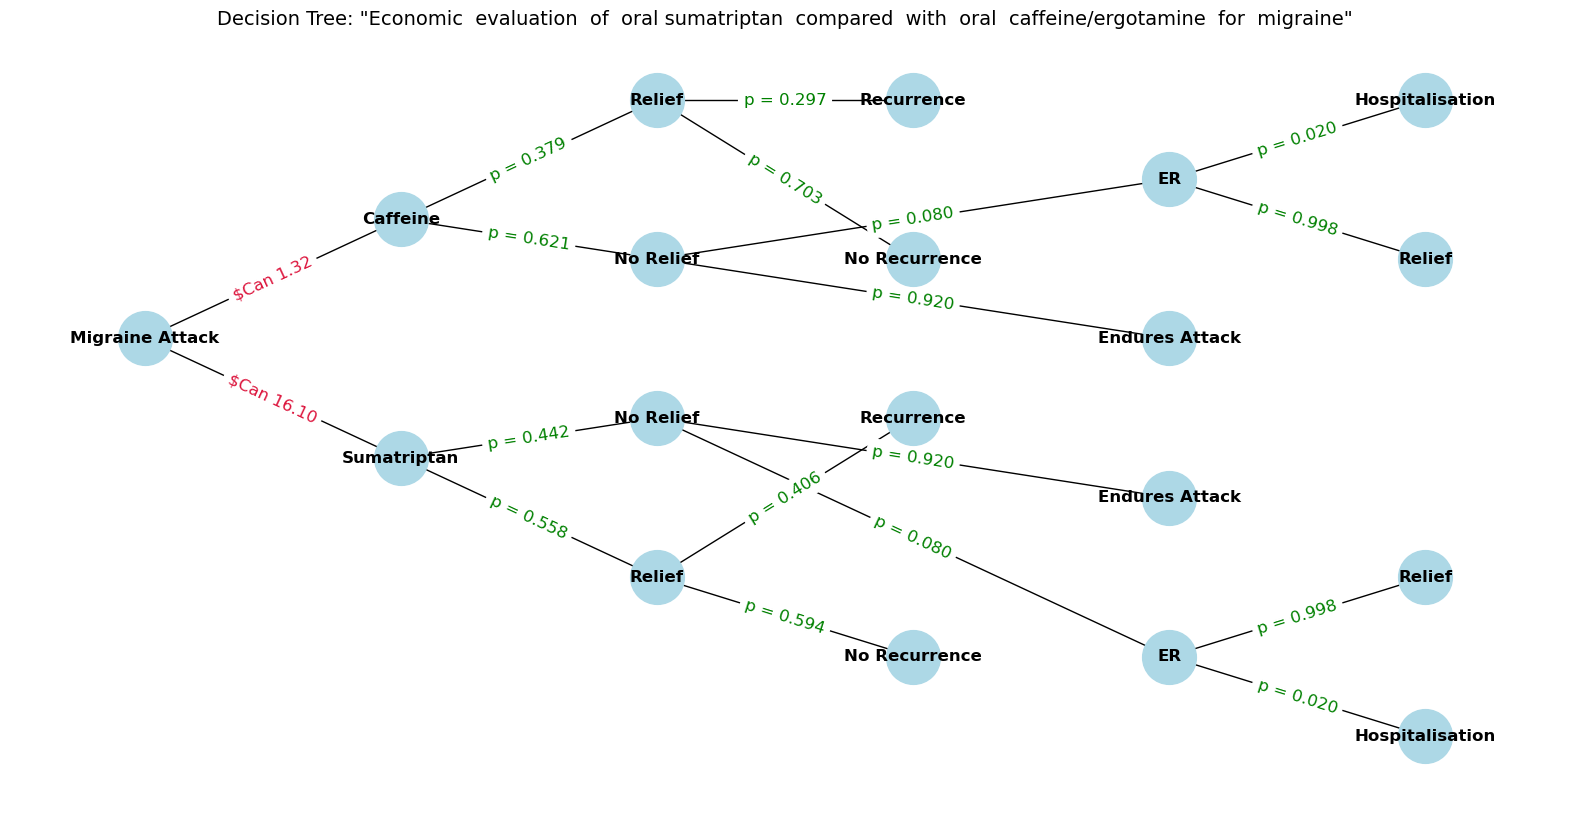

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos y bordes al árbol de decisión con nombres completos
G.add_node('Migraine Attack', label='Migraine Attack')
G.add_node('Sumatriptan', label='Sumatriptan')
G.add_node('Caffeine', label='Caffeine')
G.add_node('Relief_Sumatriptan', label='Relief')
G.add_node('Relief_Caffeine', label='Relief')
G.add_node('No Relief_Sumatriptan', label='No Relief')
G.add_node('No Relief_Caffeine', label='No Relief')
G.add_node('No Recurrence_Sumatriptan', label='No Recurrence')
G.add_node('Recurrence_Sumatriptan', label='Recurrence')
G.add_node('No Recurrence_Caffeine', label='No Recurrence')
G.add_node('Recurrence_Caffeine', label='Recurrence')
G.add_node('Endures Attack_Sumatriptan', label='Endures Attack')
G.add_node('ER_Sumatriptan', label='ER')
G.add_node('Endures Attack_Caffeine', label='Endures Attack')
G.add_node('ER_Caffeine', label='ER')
G.add_node('Relief_ER_Sumatriptan', label='Relief')
G.add_node('Hospitalisation_ER_Sumatriptan', label='Hospitalisation')
G.add_node('Relief_ER_Caffeine', label='Relief')
G.add_node('Hospitalisation_ER_Caffeine', label='Hospitalisation')

# Conectar los nodos adecuadamente
G.add_edge('Migraine Attack', 'Sumatriptan')
G.add_edge('Migraine Attack', 'Caffeine')
G.add_edge('Sumatriptan', 'Relief_Sumatriptan')
G.add_edge('Sumatriptan', 'No Relief_Sumatriptan')
G.add_edge('Caffeine', 'Relief_Caffeine')
G.add_edge('Caffeine', 'No Relief_Caffeine')
G.add_edge('Relief_Sumatriptan', 'No Recurrence_Sumatriptan')
G.add_edge('Relief_Sumatriptan', 'Recurrence_Sumatriptan')
G.add_edge('Relief_Caffeine', 'No Recurrence_Caffeine')
G.add_edge('Relief_Caffeine', 'Recurrence_Caffeine')
G.add_edge('No Relief_Sumatriptan', 'Endures Attack_Sumatriptan')
G.add_edge('No Relief_Sumatriptan', 'ER_Sumatriptan')
G.add_edge('No Relief_Caffeine', 'Endures Attack_Caffeine')
G.add_edge('No Relief_Caffeine', 'ER_Caffeine')
G.add_edge('ER_Sumatriptan', 'Relief_ER_Sumatriptan')
G.add_edge('ER_Sumatriptan', 'Hospitalisation_ER_Sumatriptan')
G.add_edge('ER_Caffeine', 'Relief_ER_Caffeine')
G.add_edge('ER_Caffeine', 'Hospitalisation_ER_Caffeine')

# Definir la posición de los nodos manualmente para una disposición más ordenada
pos = {
    'Migraine Attack': (0, 0),
    'Sumatriptan': (1.5, -1.5),
    'Caffeine': (1.5, 1.5),
    'Relief_Caffeine': (3, 3),
    'No Relief_Caffeine': (3, 1),
    'No Recurrence_Caffeine': (4.5, 1),
    'Recurrence_Caffeine': (4.5, 3),
    'Relief_Sumatriptan': (3, -3),
    'No Relief_Sumatriptan': (3, -1),
    'No Recurrence_Sumatriptan': (4.5, -3),
    'Recurrence_Sumatriptan': (4.5, -1),
    'Endures Attack_Sumatriptan': (6, -2),
    'ER_Sumatriptan': (6, -4),
    'Endures Attack_Caffeine': (6, 0),
    'ER_Caffeine': (6, 2),
    'Relief_ER_Sumatriptan': (7.5, -3),
    'Hospitalisation_ER_Sumatriptan': (7.5, -5),
    'Relief_ER_Caffeine': (7.5, 1),
    'Hospitalisation_ER_Caffeine': (7.5, 3),
    'No Recurrence_Sumatriptan': (4.5, -4),  # Nueva posición para 'No Recurrence_Sumatriptan'
}

# Etiquetas de costo
cost_labels = {
    ("Migraine Attack", "Sumatriptan"): "$Can 16.10",
    ("Migraine Attack", "Caffeine"): "$Can 1.32",
}

# Probabilidades para Relief y No Relief de Sumatriptan
probabilities_sumatriptan = {
    ("Sumatriptan", "Relief_Sumatriptan"): 0.558,
    ("Sumatriptan", "No Relief_Sumatriptan"): 0.442,
    ("No Relief_Sumatriptan", "Endures Attack_Sumatriptan"): 0.92,
    ("No Relief_Sumatriptan", "ER_Sumatriptan"): 0.08,
    ("Relief_Sumatriptan", "No Recurrence_Sumatriptan"): 0.594,
    ("Relief_Sumatriptan", "Recurrence_Sumatriptan"): 0.406,
    ("ER_Sumatriptan", "Relief_ER_Sumatriptan"): 0.998,
    ("ER_Sumatriptan", "Hospitalisation_ER_Sumatriptan"): 0.02
}

# Probabilidades para Relief y No Relief de Caffeine
probabilities_caffeine = {
    ("Caffeine", "Relief_Caffeine"): 0.379,
    ("Caffeine", "No Relief_Caffeine"): 0.621,
    ("Relief_Caffeine", "No Recurrence_Caffeine"): 0.703,
    ("Relief_Caffeine", "Recurrence_Caffeine"): 0.297,
    ("No Relief_Caffeine", "Endures Attack_Caffeine"): 0.92,
    ("No Relief_Caffeine", "ER_Caffeine"): 0.08,
    ("ER_Caffeine", "Relief_ER_Caffeine"): 0.998,
    ("ER_Caffeine", "Hospitalisation_ER_Caffeine"): 0.02
}

# Crear una figura más grande
plt.figure(figsize=(20, 10))
plt.title('Decision Tree: "Economic  evaluation  of  oral sumatriptan  compared  with  oral  caffeine/ergotamine  for  migraine"', fontsize=14)

# Dibujar el árbol de decisión sin flechas
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_size=1500, 
        node_color='lightblue', font_size=12, font_weight='bold', arrows=False)

# Dibujar las etiquetas de costo en las aristas
nx.draw_networkx_edge_labels(G, pos, edge_labels=cost_labels, font_size=12, font_color='crimson')

# Dibujar las etiquetas de probabilidad en las aristas de Sumatriptan
edge_labels_sumatriptan = {
    ("Sumatriptan", "Relief_Sumatriptan"): f'p = {probabilities_sumatriptan.get(("Sumatriptan", "Relief_Sumatriptan"), 0):.3f}',
    ("Sumatriptan", "No Relief_Sumatriptan"): f'p = {probabilities_sumatriptan.get(("Sumatriptan", "No Relief_Sumatriptan"), 0):.3f}',
    ('No Relief_Sumatriptan', 'Endures Attack_Sumatriptan'): f'p = {probabilities_sumatriptan.get(("No Relief_Sumatriptan", "Endures Attack_Sumatriptan"), 0):.3f}',
    ('No Relief_Sumatriptan', 'ER_Sumatriptan'): f'p = {probabilities_sumatriptan.get(("No Relief_Sumatriptan", "ER_Sumatriptan"), 0):.3f}',
    ("Relief_Sumatriptan", "No Recurrence_Sumatriptan"): f'p = {probabilities_sumatriptan.get(("Relief_Sumatriptan", "No Recurrence_Sumatriptan"), 0):.3f}',
    ("Relief_Sumatriptan", "Recurrence_Sumatriptan"): f'p = {probabilities_sumatriptan.get(("Relief_Sumatriptan", "Recurrence_Sumatriptan"), 0):.3f}',
    ("ER_Sumatriptan", "Relief_ER_Sumatriptan"): f'p = {probabilities_sumatriptan.get(("ER_Sumatriptan", "Relief_ER_Sumatriptan"), 0):.3f}',
    ("ER_Sumatriptan", "Hospitalisation_ER_Sumatriptan"): f'p = {probabilities_sumatriptan.get(("ER_Sumatriptan", "Hospitalisation_ER_Sumatriptan"), 0):.3f}',
}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels_sumatriptan, font_size=12, font_color='green')

# Dibujar las etiquetas de probabilidad en las aristas de Caffeine
edge_labels_caffeine = {
    ("Caffeine", "Relief_Caffeine"): f'p = {probabilities_caffeine.get(("Caffeine", "Relief_Caffeine"), 0):.3f}',
    ("Caffeine", "No Relief_Caffeine"): f'p = {probabilities_caffeine.get(("Caffeine", "No Relief_Caffeine"), 0):.3f}',
    ("Relief_Caffeine", "No Recurrence_Caffeine"): f'p = {probabilities_caffeine.get(("Relief_Caffeine", "No Recurrence_Caffeine"), 0):.3f}',
    ("Relief_Caffeine", "Recurrence_Caffeine"): f'p = {probabilities_caffeine.get(("Relief_Caffeine", "Recurrence_Caffeine"), 0):.3f}',
    ("No Relief_Caffeine", "Endures Attack_Caffeine"): f'p = {probabilities_caffeine.get(("No Relief_Caffeine", "Endures Attack_Caffeine"), 0):.3f}',
    ("No Relief_Caffeine", "ER_Caffeine"): f'p = {probabilities_caffeine.get(("No Relief_Caffeine", "ER_Caffeine"), 0):.3f}',
    ("ER_Caffeine", "Relief_ER_Caffeine"): f'p = {probabilities_caffeine.get(("ER_Caffeine", "Relief_ER_Caffeine"), 0):.3f}',
    ("ER_Caffeine", "Hospitalisation_ER_Caffeine"): f'p = {probabilities_caffeine.get(("ER_Caffeine", "Hospitalisation_ER_Caffeine"), 0):.3f}',
}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels_caffeine, font_size=12, font_color='green')

# Mostrar el árbol de decisión
plt.show()

In [2]:
# Probabilidades para cada nodo en el árbol de decisión

node_probabilities = {
    "Migraine Attack": {
        "Sumatriptan": 0.5,
        "Caffeine": 0.5,
    },
    "Sumatriptan": {
        "Relief_Sumatriptan": 0.594,
        "No Relief_Sumatriptan": 0.406,
    },
    "Caffeine": {
        "Relief_Caffeine": 0.379,
        "No Relief_Caffeine": 0.621,
    },
    "Relief_Sumatriptan": {
        "Recurrence_Sumatriptan": 0.3,
        "No Recurrence_Sumatriptan": 0.7,
    },
    "Relief_Caffeine": {
        "Recurrence_Caffeine": 0.297,
        "No Recurrence_Caffeine": 0.703,
    },
    "No Relief_Sumatriptan": {
        "Endures Attack_Sumatriptan": 0.92,
        "ER_Sumatriptan": 0.08,
    },
    "No Relief_Caffeine": {
        "Endures Attack_Caffeine": 0.92,
        "ER_Caffeine": 0.08,
    },
    "ER_Sumatriptan": {
        "Relief_ER_Sumatriptan": 0.998,
        "Hospitalisation_ER_Sumatriptan": 0.002,
    },
    "ER_Caffeine": {
        "Relief_ER_Caffeine": 0.998,
        "Hospitalisation_ER_Caffeine": 0.002,
    },
}

### *Análisis Determinístico*

* Análisis de Escenarios Determinísticos: En algunos casos, es útil realizar un análisis en el que se tomen decisiones basadas en probabilidades predefinidas, lo que se conoce como un análisis determinístico. Este enfoque ayuda a comprender cómo se desarrollarían los eventos en situaciones específicas donde las decisiones se toman siguiendo un patrón establecido.

* Estudio de Resultados Probables: Aunque el análisis es determinístico, aún permite evaluar los resultados probables en función de las probabilidades predefinidas para cada decisión. Esto es valioso para entender cómo las decisiones individuales afectan los resultados finales y cómo diferentes cursos de acción impactan los resultados.

* Reproducibilidad y Control: La implementación del análisis determinístico es completamente reproducible y controlable. Puedes realizar el análisis múltiples veces con la misma semilla aleatoria para obtener resultados idénticos. Esto es útil para verificar y validar los resultados, así como para realizar análisis de sensibilidad al cambiar las probabilidades.

* Comparación con Análisis Probabilísticos: El análisis determinístico sirve como punto de referencia o comparación con análisis probabilísticos más complejos, como simulaciones Monte Carlo. Esto permite evaluar cómo difieren los resultados bajo suposiciones determinísticas en comparación con suposiciones probabilísticas y proporciona una comprensión más completa de los escenarios posibles.

* Situaciones con Datos Limitados: En situaciones donde no se disponga de datos precisos de probabilidades o donde las probabilidades sean desconocidas, un análisis determinístico puede ser una aproximación razonable para tomar decisiones basadas en suposiciones simplificadas.

En resumen, el código que has proporcionado es una herramienta útil para realizar análisis en situaciones donde se toman decisiones basadas en probabilidades predefinidas, lo que puede proporcionar información valiosa sobre los resultados probables y servir como punto de partida para análisis más complejos. Es especialmente útil cuando se requiere simplicidad, reproducibilidad y control en la evaluación de escenarios.

In [3]:
# Función para realizar un análisis determinístico en el árbol de decisión
def deterministic_analysis(node_probabilities):
    current_node = "Migraine Attack"  # Comenzar desde el nodo raíz
    total_cost = 0  # Inicializar el costo total

    while True:
        if current_node == "Migraine Attack":
            # Tomar una decisión basada en las probabilidades
            if random.random() < node_probabilities[current_node]["Sumatriptan"]:
                current_node = "Sumatriptan"
                total_cost += 16.10  # Costo de Sumatriptan
            else:
                current_node = "Caffeine"
                total_cost += 1.32  # Costo de Caffeine
                
        elif current_node == "Sumatriptan":
            if random.random() < node_probabilities[current_node]["Relief_Sumatriptan"]:
                current_node = "Relief_Sumatriptan"
            else:
                current_node = "No Relief_Sumatriptan"
                
        elif current_node == "Caffeine":
            if random.random() < node_probabilities[current_node]["Relief_Caffeine"]:
                current_node = "Relief_Caffeine"
            else:
                current_node = "No Relief_Caffeine"
        elif current_node == "Relief_Sumatriptan":
            if random.random() < node_probabilities[current_node]["Recurrence_Sumatriptan"]:
                current_node = "Recurrence_Sumatriptan"
            else:
                current_node = "No Recurrence_Sumatriptan"
        elif current_node == "Relief_Caffeine":
            if random.random() < node_probabilities[current_node]["Recurrence_Caffeine"]:
                current_node = "Recurrence_Caffeine"
            else:
                current_node = "No Recurrence_Caffeine"
        elif current_node == "No Relief_Sumatriptan":
            if random.random() < node_probabilities[current_node]["Endures Attack_Sumatriptan"]:
                current_node = "Endures Attack_Sumatriptan"
            else:
                current_node = "ER_Sumatriptan"
        elif current_node == "No Relief_Caffeine":
            if random.random() < node_probabilities[current_node]["Endures Attack_Caffeine"]:
                current_node = "Endures Attack_Caffeine"
            else:
                current_node = "ER_Caffeine"
        elif current_node == "ER_Sumatriptan":
            if random.random() < node_probabilities[current_node]["Relief_ER_Sumatriptan"]:
                current_node = "Relief_ER_Sumatriptan"
            else:
                current_node = "Hospitalisation_ER_Sumatriptan"
        elif current_node == "ER_Caffeine":
            if random.random() < node_probabilities[current_node]["Relief_ER_Caffeine"]:
                current_node = "Relief_ER_Caffeine"
            else:
                current_node = "Hospitalisation_ER_Caffeine"
        else:
            break  # Llegamos a un nodo terminal, finalizar el análisis

    return current_node, total_cost

# Semilla para efectos de reproducibilidad en el experimento
random.seed(42)

# Realizar análisis determinístico
result, cost = deterministic_analysis(node_probabilities)

# Imprimir el resultado y costo total
print(f'Resultado: {result}')
print(f'Costo Total: $Can {cost:.2f}')

Resultado: Recurrence_Caffeine
Costo Total: $Can 1.32


### *Análisis Probabilístico*

En nuestro experimento, utilizamos una función de distribución uniforme para simular el proceso de toma de decisiones en el árbol de decisión. La razón principal para utilizar una distribución uniforme es que, en este contexto, representa una forma justa y equitativa de modelar las probabilidades de tomar diferentes caminos en el árbol de decisión. Aquí hay una explicación intuitiva de por qué elegimos una distribución uniforme:

* Equidad en la elección: Cuando un paciente enfrenta un ataque de migraña y debe decidir entre dos opciones, como tomar Sumatriptan o Caffeine, no tiene información adicional que lo incline significativamente hacia una de las dos opciones. En otras palabras, no hay un sesgo evidente hacia ninguna de las dos decisiones. Por lo tanto, asignar una probabilidad igual (uniforme) a ambas opciones refleja esta falta de sesgo y permite que el modelo de simulación sea imparcial en la toma de decisiones.

* Simplicidad: La distribución uniforme es simple y fácil de entender. Asignar probabilidades iguales a todas las opciones es una suposición simple que se ajusta bien cuando no tenemos información que sugiera lo contrario. Otras distribuciones, como las distribuciones de probabilidad personalizadas basadas en datos, requerirían información adicional y podrían complicar innecesariamente el modelo.

* Reproducibilidad y control: Una distribución uniforme es completamente reproducible y controlable. Esto significa que podemos repetir el experimento de Monte Carlo con la misma semilla aleatoria y obtendremos resultados idénticos. Esto es útil para verificar y validar nuestros resultados.

* Generalización: La distribución uniforme es una elección segura en situaciones donde no tenemos información específica sobre las probabilidades de cada opción. Se puede considerar como un "escenario peor" en términos de incertidumbre, lo que garantiza que nuestro modelo sea conservador y no exagere ni subestime las probabilidades de ciertos eventos.

En resumen, utilizamos una distribución uniforme en nuestro experimento para garantizar que el modelo de simulación sea imparcial, simple, controlable y aplicable en situaciones de incertidumbre donde no tenemos información clara sobre las probabilidades de las diferentes opciones. Esto nos permite obtener una comprensión inicial de las probabilidades asociadas con cada resultado en el árbol de decisión y realizar análisis exploratorios de manera justa y equitativa.

In [4]:
# Función para realizar un análisis probabilístico utilizando simulación Monte Carlo
def monte_carlo_simulation_uniform(node_probabilities:dict, num_simulations:int):
    results = {"Relief_Sumatriptan": 0, "No Relief_Sumatriptan": 0, "Recurrence_Sumatriptan": 0, 
               "No Recurrence_Sumatriptan": 0, "Endures Attack_Sumatriptan": 0, "ER_Sumatriptan": 0,
               "Relief_Caffeine": 0, "No Relief_Caffeine": 0, "Recurrence_Caffeine": 0, 
               "No Recurrence_Caffeine": 0, "Endures Attack_Caffeine": 0, "ER_Caffeine": 0}

    for _ in range(num_simulations):
        
        current_node = "Migraine Attack"
        while current_node != "Relief_Sumatriptan" and current_node != "No Relief_Sumatriptan" and current_node != "Recurrence_Sumatriptan" and current_node != "No Recurrence_Sumatriptan" and current_node != "Endures Attack_Sumatriptan" and current_node != "ER_Sumatriptan" and current_node != "Relief_Caffeine" and current_node != "No Relief_Caffeine" and current_node != "Recurrence_Caffeine" and current_node != "No Recurrence_Caffeine" and current_node != "Endures Attack_Caffeine" and current_node != "ER_Caffeine":
            
            if current_node == "Migraine Attack":
                # Seleccionar una rama con probabilidad uniforme
                decision = random.choice(["Sumatriptan", "Caffeine"])
                current_node = decision
            elif current_node == "Sumatriptan":
                # Seleccionar una rama con probabilidad uniforme
                decision = random.choice(["Relief_Sumatriptan", "No Relief_Sumatriptan"])
                current_node = decision
            elif current_node == "Caffeine":
                # Seleccionar una rama con probabilidad uniforme
                decision = random.choice(["Relief_Caffeine", "No Relief_Caffeine"])
                current_node = decision
            elif current_node == "Relief_Sumatriptan":
                # Seleccionar una rama con probabilidad uniforme
                decision = random.choice(["Recurrence_Sumatriptan", "No Recurrence_Sumatriptan"])
                current_node = decision
            elif current_node == "Relief_Caffeine":
                # Seleccionar una rama con probabilidad uniforme
                decision = random.choice(["Recurrence_Caffeine", "No Recurrence_Caffeine"])
                current_node = decision
            elif current_node == "No Relief_Sumatriptan":
                # Seleccionar una rama con probabilidad uniforme
                decision = random.choice(["Endures Attack_Sumatriptan", "ER_Sumatriptan"])
                current_node = decision
            elif current_node == "No Relief_Caffeine":
                # Seleccionar una rama con probabilidad uniforme
                decision = random.choice(["Endures Attack_Caffeine", "ER_Caffeine"])
                current_node = decision
            elif current_node == "ER_Sumatriptan":
                # Seleccionar una rama con probabilidad uniforme
                decision = random.choice(["Relief_ER_Sumatriptan", "Hospitalisation_ER_Sumatriptan"])
                current_node = decision
            elif current_node == "ER_Caffeine":
                # Seleccionar una rama con probabilidad uniforme
                decision = random.choice(["Relief_ER_Caffeine", "Hospitalisation_ER_Caffeine"])
                current_node = decision

        results[current_node] += 1

    # Calcular las probabilidades dividiendo el número de ocurrencias por el número total de simulaciones
    probabilities = {key: value / num_simulations for key, value in results.items()}
    return probabilities

# Número de simulaciones Monte Carlo
num_simulations = 10000

# Semilla para efectos de reproducibilidad en el experimento
random.seed(89)

# Realizar el análisis probabilístico con distribución uniforme
probabilities_uniform = monte_carlo_simulation_uniform(node_probabilities, num_simulations)

# Imprimir las probabilidades resultantes
print('Probabilidades resultantes con una distribución uniforme:')
for key, value in probabilities_uniform.items():
    print(f'{key}: {value:.4f}')

Probabilidades resultantes con una distribución uniforme:
Relief_Sumatriptan: 0.2462
No Relief_Sumatriptan: 0.2589
Recurrence_Sumatriptan: 0.0000
No Recurrence_Sumatriptan: 0.0000
Endures Attack_Sumatriptan: 0.0000
ER_Sumatriptan: 0.0000
Relief_Caffeine: 0.2463
No Relief_Caffeine: 0.2486
Recurrence_Caffeine: 0.0000
No Recurrence_Caffeine: 0.0000
Endures Attack_Caffeine: 0.0000
ER_Caffeine: 0.0000


In [11]:
!pip freeze | findstr networkx >> requirements.txt
!pip freeze | findstr matplotlib >> requirements.txt